Positioning nodes


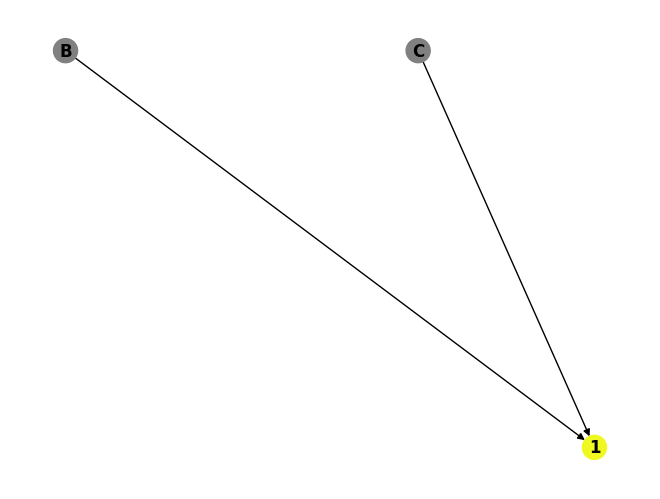

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import tensorcraft as tc

from tensorcraft.viz.program_graph import draw_program_graph, draw_expression_graph

small_program = tc.compile("A[i,j] = B[i,j] + B[j,i] + C[i] + 100 + i")
tc.viz.draw_program_graph(small_program)

Positioning nodes


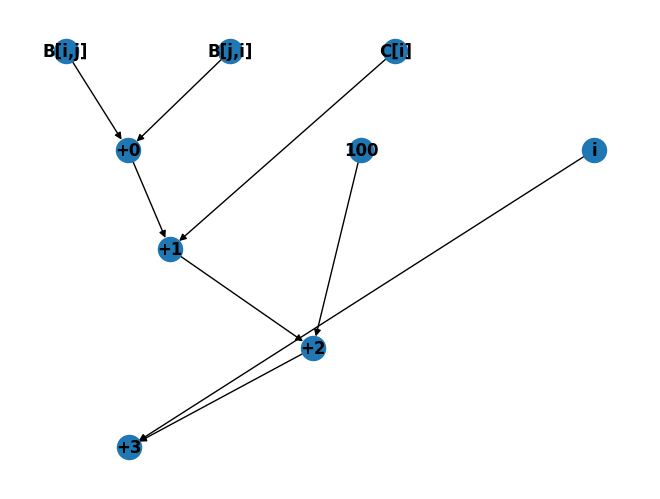

In [2]:
tc.viz.draw_expression_graph(small_program.tensor_expressions[1])

In [3]:

B = np.ones((10,10))
C = np.ones(10) + 10
expected = B + B.T + C + 100 + np.arange(10).reshape(-1,1)
result = small_program.tensor_expressions[1]({'B': B, 'C': C})
np.all(result == expected)

np.True_

In [13]:
min_red_program = tc.compile("""
Min[j] = 10000
Min[j] = (X[i,j] < Min[j]) * (X[i,j] - Min[j])
""")

X = np.random.randn(200,10)
expected = X.min(axis=0)
print(expected)

min_init = min_red_program.tensor_expressions[2]({}, output_shape=np.array([10]))
print(min_init)
min_result = min_red_program.tensor_expressions[3]({'X': X, 'Min': min_init})
print(min_result)
print(np.all(min_result == expected))



[-3.49776561 -2.65033141 -2.42412025 -2.67897758 -2.12174994 -2.4817246
 -3.0130713  -2.66920994 -2.85705588 -2.79744892]
[10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000. 10000.]
[-3.49776561 -2.65033141 -2.42412025 -2.67897758 -2.12174994 -2.4817246
 -3.0130713  -2.66920994 -2.85705588 -2.79744892]
True


Positioning nodes


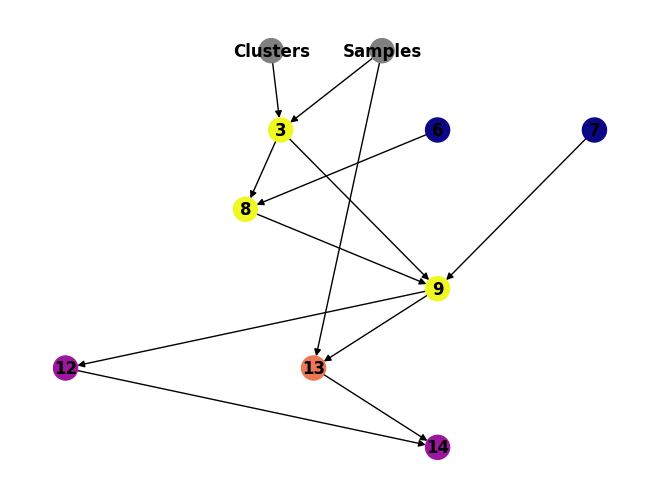

In [5]:
code = """
# Distance computation
Dist[j,k] = (Samples[j,l] - Clusters[k,l]) * (Samples[j,l] - Clusters[k,l])

# Argmin
Min[j] = 1000
Labels[j] = -1
Min[j] = (Dist[j,k] < Min[j]) * (Dist[j,k] - Min[j])
Labels[j] = (Dist[j,k] == Min[j]) * (k - Labels[j])

# Cluster update
Count[l] = (Labels[j] == l)
Update[l,k] = Samples[j,k] * (Labels[j] == l)
Update[l,k] = Update[l,k] / Count[l]
"""
kmeans_kernel = tc.compile(code)

draw_program_graph(kmeans_kernel, color_by="opcount")

In [6]:
kmeans_kernel.tensor_expressions[3].op_graph.nodes

NodeView(('Samples[j,l]', 'Clusters[k,l]', '-0', '-1', '*0'))

Positioning nodes


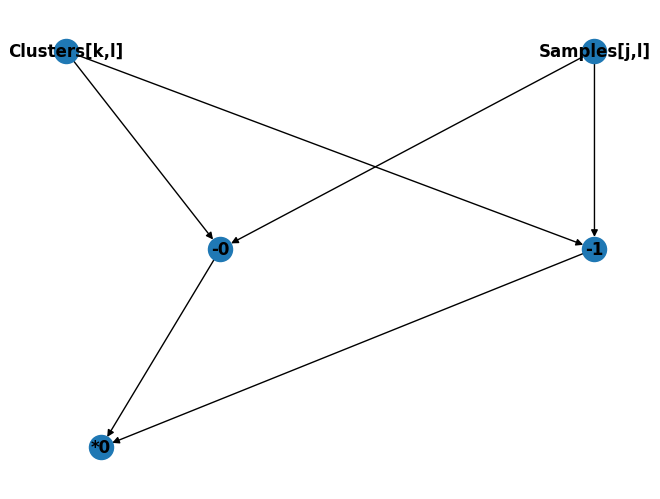

In [7]:
draw_expression_graph(kmeans_kernel.tensor_expressions[3])

Positioning nodes


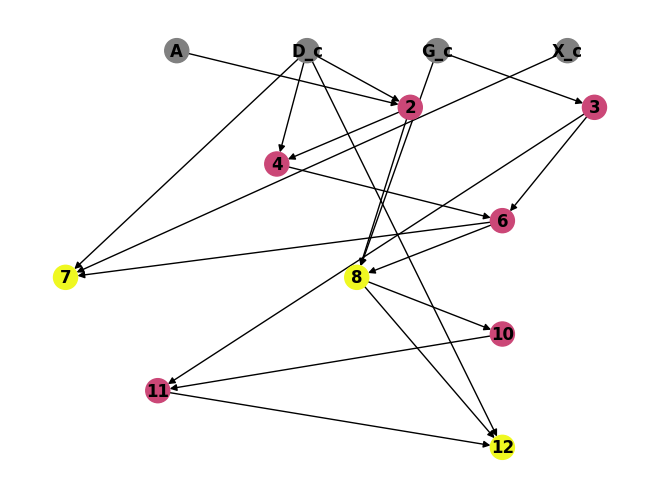

In [8]:
code = """
W_c[i] = A[i,j] * D_c[j]
Gamma_c = G_c[i] * G_c[i]
Theta_c = D_c[i] * W_c[i]

Alpha_c = Gamma_c / Theta_c
X_n[i] = X_c[i] + (Alpha_c * D_c[i])
G_n[i] = G_c[i] + (Alpha_c * W_c[i])

Gamma_n = G_n[i] * G_n[i]
Beta_n = Gamma_n / Gamma_c
Delta_n = (Beta_n * D_c[i]) - G_n[i]
"""
conjugate_gradient_kernel = tc.compile(code)

draw_program_graph(conjugate_gradient_kernel, color_by='opcount')


Positioning nodes


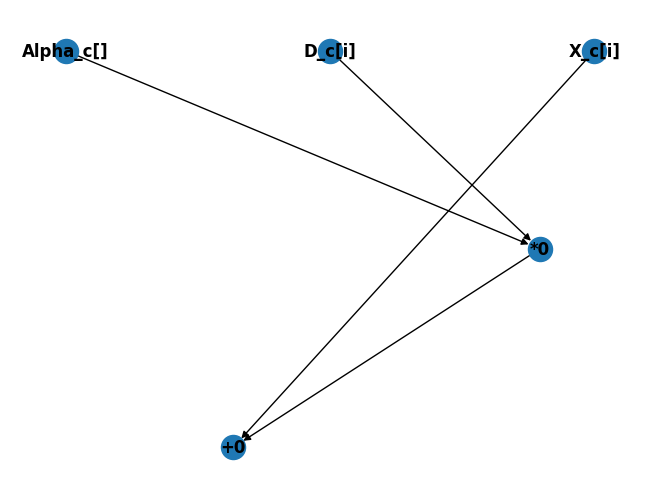

In [9]:
draw_expression_graph(conjugate_gradient_kernel.tensor_expressions[7])

In [10]:
a = eval("1 + 2")

In [11]:
import networkx as nx
graph = nx.Graph()
graph.add_node(1, neg=True)
graph.add_node(2, neg=False)
for node in graph:
    print(nx.get_node_attributes(graph, 'neg')[node])

True
False


In [12]:
print(True + True + False)

2
